# LangChain

## Response from APIs vs LangChain

In [ ]:
# 1. Response from API directly

import anthropic

client= anthropic.Anthropic()
# need to define api-key first
message=client.messages.create(
    model='claude-3-7-sonnet-20250219',
    max_tokens=1000,
    temperature=0,
    system=' You are a knowledgable physicist ai model',
    messages=[
        {
            'role':'user',
            'content':[
                {
                    'type':'text',
                    'text':'What is a blackhole?'
                }
            ]
        }
    ]
)
print(message.content)

# 2. Response from LangChain

from langchain.chat_models import ChatAnthropic
model= ChatAnthropic(model='claude-3-7-sonnet-20250219', temperature=0)
response=model.invoke("Explain the theory of relativity in simple terms.").content
print(response)

Thus as we can see while using APIS directly we have to manage a lot of things on our own like message formatting, handling different types of responses etc. But when we use LangChain it abstracts away all these complexities and provides a simple interface to interact with different models.

## 1. Models

LLMs are general purpose models that can be used for text generation, summarization, translation, and more. Chat models are specifically designed for conversational tasks and can handle multi-turn dialogues effectively. Similarly we can also use Embedding models with Langchain to convert text into vector representations for tasks like semantic search and clustering.

In [ ]:
# Language Model from Groq

from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
result=llm.invoke("Explain the theory of relativity in simple terms.").content
print(result)

This is a simple demo of how we can get responses from a language model of Groq using Langchain.

In [ ]:
# Chat Model from Groq

from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, SystemMessage
from dotenv import load_dotenv
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)

# We need to explicitly define messages such as SystemMessage, HumanMessage etc. to get multi-turn conversations.
messages=[
    SystemMessage(content="You are a helpful assistant that translates English to French."),
    HumanMessage(content="Translate the following English text to French: 'Hello, how are you?'")
]

result=llm.invoke(messages).content
print(result)

An example of how to use Conversational chat models from Groq via LangChain for a multi-turn conversation.

In [ ]:
# Using a locally downloaded Embedding model with LangChain

from langchain_huggingface import HuggingFaceEmbeddings
import sentence_transformers
embedding=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
text='My name is Sameeran'
vector=embedding.embed_query(text)
print(str(vector))

An example of how we can download and run embedding models locally using LangChain and Huggingface.

## 2. Prompts

Static Prompts are fixed templates that do not change based on input. They are useful for simple tasks where the same prompt structure can be reused. Dynamic Prompts, on the other hand, can change based on input variables or context. They are more flexible and can be tailored to specific tasks or user inputs. Static prompt give much control to user which can lead to llm hallucinations while dynamic prompts can help in reducing such issues by providing more context.

In [ ]:
# Creating single-turn dynamic prompt with LangChain

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
template=PromptTemplate(template='''Describe the given {product} in a creative way.''', input_variables=['product'])
prompt=template.invoke({'product':'IPhone 15 Pro Max'})
result=llm.invoke(prompt).content
print(result)

In [ ]:
# Saving and loading predefined prompt templates with LangChain

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate,load_prompt
load_dotenv()

template=PromptTemplate(template='''Describe the given {product} in a creative way.''', input_variables=['product'])
template.save('template.json')
loaded_template=load_prompt('template.json') # file path
prompt=loaded_template.invoke({'product':'Samsung Galaxy S23 Ultra'})
result=llm.invoke(prompt).content
print(result)


Messages like System, Human, AI can be used to create multi-turn conversations with a conversational model. They can be used to explicitly define the roles of different participants in the conversation. Also allow for easy storage and retrieval of chat histories.

Human Message is used to represent the input from the user.
AI Message is used to represent the response from the AI model.
System Message is used to set the context or behavior of the AI model.

In [ ]:
# Using Messages to create static multi-turn conversations with LangChain

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
load_dotenv()
llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)

messages=[
    SystemMessage(content="You are a helpful assistant that translates English to French."),
    HumanMessage(content="Translate the following English text to French: 'Hello, how are you?'")
]
result=llm.invoke(messages).content
# We can add the result as AIMessage to continue the conversation
messages.append(AIMessage(content=result))
print(messages)


In [ ]:
# Using ChatPromptTemplate for dynamic multi-turn conversations with LangChain.

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import ChatPromptTemplate
load_dotenv()

# assigning roles and their content in chat prompt template
chat_template= ChatPromptTemplate.from_messages([
    ("system","You are a helpful {domain} assistant."),
    ("human","Explain {topic} in simple terms.")
])

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
prompt=chat_template.invoke({'domain':'technology','topic':'machine learning'})
result=llm.invoke(prompt).content
print(result)

Message Placeholder is a special placeholder used inside ChatPromptTemplate to dynamically insert chat history or a list of messages at runtime. It allows for more flexible and context-aware conversations by incorporating previous interactions into the prompt.

In [ ]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import ChatPromptTemplate, MessagePlaceholder
load_dotenv()

chat_template=ChatPromptTemplate.from_messages([
    ('system','You are a helpful customer support assistant.'),
    MessagePlaceholder(variable_name='chat_history'),
    ('human','{query}')
])
llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)

# create chat history where we save chat history in a text file
chat_history=[]
with open('chat_history.txt') as f:
    chat_history.extend(f.readlines())

# create prompt to dynamically insert chat history with help of MessagePlaceholder
prompt=chat_template.invoke({'chat_history':chat_history,'query':'How can I reset my password?'})

## 3. Structured Outputs

Structured Output refers to the practice of formatting the output from language models in a predefined structure, such as JSON rather than plain text.This makes the output easier to parse and use programmatically. 

i. Getting Structured Outputs for models that support it natively. Methods are using TypedDict, Pydanctic or Json Schemas.

In [ ]:
# 1. Using TypedDict which allows us to define the data types of the keys and values in a dictionary. 

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict,Annotated
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)

# create an output schema using the TypedDict class
class Format(TypedDict):
    # here Annotated is used to add descriptions to the fields
    summary:Annotated[str,'A brief summary of the text']
    sentiment:Annotated[str,' The sentiment of the text, can be Positive, Negative or Neutral']
    key_themes:Annotated[list[str],'A list of key themes discussed in the text']

# now use this schema and pass it to the llm
llm=llm.with_structured_output(Format)
response=llm.invoke("Analyze the following text: 'LangChain is a powerful framework for building applications with language models. It simplifies the process of integrating various components and allows developers to create complex workflows easily.'")
print(response)

In [ ]:
# 2. Using Pydantic library to define structured output schema. Used when you want data validation, need to define default values or optional fields in case llm misses them.

from typing import Optional
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from pydantic import BaseModel, Field
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)

# create an output schema using the BaseModel class from Pydantic
class Format(BaseModel):
    key_themes: list[str]=Field(description="A list of key themes discussed in the text")
    summary: str=Field(description="A brief summary of the text")
    pros: Optional[list[str]]=Field(default=None,description="A list of pros of the text")


ii. Using Output Parsers to convert unstructured text outputs into structured formats for LLMs that do not support structured outputs natively.

In [ ]:
# 1. Using StringOutputParser to parse unstructured text output as plain text.

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=StrOutputParser()
template=PromptTemplate(template='''Describe the given {product} in a creative way.''', input_variables=['product'])

chain=template|llm|parser
result=chain.invoke({'product':'Google Pixel 8 Pro'})
print(result)

In [ ]:
# 2. Using JsonOutputParser to parse unstructured text output as JSON. This parser just returns the output in JSON format but it doesnt enforce any schema for the llm to follow.

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=JsonOutputParser()
template=PromptTemplate(template='Provide the details of the given {product}. \n {format_intructions}',
                        input_variables=['product'],
                        partial_variables={'format_intructions':parser.get_format_instructions()})
# this partial variable allows us to include the return type of the output of the llm according to the parser used. for eg here it is JSON.

chain=template|llm|parser
result=chain.invoke({'product':'Google Pixel 8 Pro'})
print(result)
print(type(result))

Using Json Output Parser we dont have control over the structure of the JSON output. for eg we cannot determine what the keys will be in the output JSON and without knowing the keys we cannot access the values. This can be avoided by using StructuredOutputParser where we can create a predefined schema with known key values.

In [ ]:
# 3. StructuredOutputParser helps to extract a structured JSON data from LLM based on a predefined schema but doesnt provide data validation.

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StructuredOutputParser, ResponseSchema
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)

schema= [
    ResponseSchema(name='summary', description='A brief summary of the text'),
    ResponseSchema(name='sentiment', description='The sentiment of the text, can be Positive, Negative or Neutral'),
    ResponseSchema(name='key_themes', description='A list of key themes discussed in the text')
]
# passing the schema to the parser
parser=StructuredOutputParser.from_response_schemas(schema)
template=PromptTemplate(template='''Analyze the following text: {text}.\n{format_instructions}''',
                        input_variables=['text'],
                        partial_variables={'format_instructions':parser.get_format_instructions()})
chain=template|llm|parser
result=chain.invoke({'text':"LangChain is a powerful framework for building applications with language models. It simplifies the process of integrating various components and allows developers to create complex workflows easily."})
print(result)

# Note. this is an example, actually this LLM doesnt support StructuredOutputParser


In [ ]:
# 4. PydanticOutputParser allows us to define and enforce a Pydantic model as the output schema for parsing the LLM output. It ensures data valdation according to the defined schema.

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field
from typing import Optional
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)

# create an output schema using the BaseModel class from Pydantic
class Format(BaseModel):
    key_themes: list[str]=Field(description="A list of key themes discussed in the text")
    summary: str=Field(description="A brief summary of the text")
    pros: Optional[list[str]]=Field(default=None,description="A list of pros of the text")

# passing the pydantic model to the parser
parser=PydanticOutputParser(pydantic_object=Format)
template=PromptTemplate(template='''Analyze the following text: {text}.\n{format_intructions}''',
                        input_variables=['text'],
                        partial_variables={'format_intructions':parser.get_format_instructions()})
chain=template|llm|parser
result=chain.invoke({'text':"LangChain is a powerful framework for building applications with language models. It simplifies the process of integrating various components and allows developers to create complex workflows easily."})
print(result)

## 4. Chains

A chain is a structured pipeline that links multiple components together to perform a task in a defined sequence. Chains can include components like language models, prompt templates, and output parsers. They help in breaking down complex tasks into smaller, manageable steps.

In [ ]:
# 1. Simple Chain

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
load_dotenv()
llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=StrOutputParser()
template=PromptTemplate(template='''Describe the given {product} in a creative way.''', input_variables=['product'])

# creating a chain by linking prompt template, llm and output parser
chain=template|llm|parser
result=chain.invoke({'product':'OnePlus 11'})
print(result)
chain.get_graph().print_ascii() # to visualize the chain structure

In [ ]:
# 2. Sequential Chain (using multiple prompt templates and llms )

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=StrOutputParser()

template1=PromptTemplate(template='''Describe the given {product} in a detailed, creative way.''', input_variables=['product'])
template2=PromptTemplate(template='''Based on the following product description, generate a catchy marketing slogan: {description}''', input_variables=['description'])

# creating a sequential chain by linking multiple prompt templates and llms
chain=template1|llm|parser|template2|llm|parser
result=chain.invoke({'product':'OnePlus 11'})
print(result)

In [ ]:
# 3. Parallel Chain (using RunnableParallel to run multiple branches in parallel and combine their outputs)

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableParallel
load_dotenv()

llm = ChatGroq(model='llama-3.3-70b-versatile', temperature=0)
parser = StrOutputParser()

template1 = PromptTemplate(template="generate short and simple notes from the following text: {text}", input_variables=['text'])
template2 = PromptTemplate(template="generate question-answer pairs from the following text: {text}", input_variables=['text'])
template3 = PromptTemplate(template="Merge these notes: {notes} and these QA pairs: {qa_pairs} into a comprehensive study guide.", input_variables=['notes', 'qa_pairs'])

# 1. Define the parallel branches
parallel_chain = RunnableParallel({
    'notes': template1 | llm | parser,
    'qa_pairs': template2 | llm | parser
})

# 2. Define the full chain
# The output of parallel_chain is a dict: {'notes': '...', 'qa_pairs': '...'}
# This dict matches the input requirements of template3 perfectly.
chain = parallel_chain | template3 | llm | parser

result = chain.invoke({'text': 'LangChain is a powerful framework for building applications with language models. It simplifies the process of integrating various components and allows developers to create complex workflows easily.'})
print(result)

In [ ]:
# 4. Conditional Chain (using RunnableBranch to choose different branches based on input)

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableBranch, RunnableLambda
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field
from typing import Literal
load_dotenv()

llm = ChatGroq(model='llama-3.3-70b-versatile', temperature=0)
parser = StrOutputParser()

# To ensure the LLM output can be used for branching, we define a Pydantic model for sentiment classification
class FeedBack(BaseModel):
    sentiment: Literal['positive', 'negative']=Field(description="The sentiment of the review, can be positive or negative")
sentiment_parser=PydanticOutputParser(pydantic_object=FeedBack)

prompt1 = PromptTemplate(
    template="""Classify the sentiment of the following review as Positive or Negative.
    {format_instructions}
    Review: {review}""",
    input_variables=['review'], 
    partial_variables={'format_instructions': sentiment_parser.get_format_instructions()}
)
prompt2=PromptTemplate(template='''Generate a response to this {review} positive customer review. Do not say anything except the response.''')
prompt3=PromptTemplate(template='''Generate a constructive response to address this {review} negative customer review.  Do not say anything except the response.''')

classifier_chain=prompt1|llm|sentiment_parser

# Create conditional branches based on sentiment                               
branch_chain=RunnableBranch(
    (lambda x:x.sentiment=='positive', prompt2|llm|parser),                  # executes if based on the input x, condition is True
    (lambda x:x.sentiment=='negative', prompt3|llm|parser),
    RunnableLambda(lambda x:"Could not determine sentiment.")                   # here we can use a default chain if none of the conditions match. Here we dont have a default chain so we turn a lambda function with response into a chain using RunnableLambda.
)

chain=classifier_chain|branch_chain
result=chain.invoke({'review':'The product quality is excellent and I am very satisfied with my purchase!'})
print(result)

## 5. Runnables

Runnables are abstractions in LangChain that represent executable components or workflows. They can encapsulate various operations, such as calling language models, processing data, or chaining multiple steps together. Runnables provide a unified interface for executing these operations, making it easier to build and manage complex workflows.

i. Task Specific Runnables: These are core LangChain components that perform specific tasks, such as invoking a language model or processing data. Examples include LLMs, Chat Models, Prompt Templates, and Output Parsers.

ii. Runnable Primitives: These are fundamental building blocks that help connect different Task Specific Runnables together to create complex workflows. Examples include RunnableSequence, RunnableBranch, RunnableLambda, RunnableParallel, RunnablePassthrough etc.

In [ ]:
# 1. RunnableSequence: This primitive allows you to chain multiple Runnables together in a sequential manner. The output of one Runnable becomes the input for the next Runnable in the sequence.

# we can use the pipe operator '|' to create a RunnableSequence

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableSequence
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=StrOutputParser()
prompt=PromptTemplate(template='''Write a funny joke about {topic}''',input_variables=['topic'])

# creating a runnable sequence by linking prompt template, llm and output parser
chain=RunnableSequence(prompt,llm,parser)
result=chain.invoke({'topic':'computers'})
print(result)

In [ ]:
# 2. RunnableParallel: This primitive allows you to run multiple Runnables in parallel. Each Runnable operates independently, recieves the same input and their outputs are collected into a dictionary.

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableParallel
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=StrOutputParser()
prompt1=PromptTemplate(template='''Write a tweet about {topic}''',input_variables=['topic'])
prompt2=PromptTemplate(template='''Craft a linkedin post about {topic}''',input_variables=['topic'])
# creating a runnable parallel by linking multiple prompt templates, llms and output parsers
chain=RunnableParallel({
    'tweet':prompt1|llm|parser,
    'linkedin':prompt2|llm|parser
})
result=chain.invoke({'topic':'artificial intelligence'})
print(result)

In [ ]:
# 3. RunnablePassThrough: This primitive simply passes the input it receives directly to its output without any modifications or processing. It acts as a transparent conduit for data.

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableSequence, RunnableParallel, RunnablePassthrough
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=StrOutputParser()
prompt=PromptTemplate(template='''Write a funny joke about {topic}''',input_variables=['topic'])

# creating a runnable sequence by linking prompt template, llm and output parser
joke_chain=RunnableSequence(prompt,llm,parser)

# Now we wish to explain the joke generated above, and print both the joke and its explanation, thus we use RunnablePassThrough to print the joke as it is.
prompt2=PromptTemplate(template='''Explain the following joke: {joke}''',input_variables=['joke'])
explain_chain=RunnableParallel({
    'joke':RunnablePassthrough(),
    'explaination':RunnableSequence(prompt2,llm,parser)
})

chain=RunnableSequence(joke_chain,explain_chain)
result=chain.invoke({'topic':'Artificial Intelligence'})
print(result)

In [ ]:
# 4. RunnableLambda: This primitive allows you to apply custom python functions as Runnables within your ai pipelines.

# we will create a chain that generates a joke and then counts the number of words in the joke using a custom python function.

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableSequence, RunnableParallel, RunnablePassthrough, RunnableLambda
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=StrOutputParser()
prompt1=PromptTemplate(template='''Write a funny joke about {topic}''',input_variables=['topic'])
joke_chain=RunnableSequence(prompt1,llm,parser)

# custom function to count words in a text
def count_words(text:str)->int:
    return len(text.split())

count_chain=RunnableParallel({
    'joke':RunnablePassthrough(),
    'word_count':RunnableLambda(count_words) # using custom function as a runnable
})

chain=RunnableSequence(joke_chain,count_chain)
result=chain.invoke({'topic':'Elephant and Ant'})
print(result)

{'joke': 'Why did the elephant invite the ant to his party?\n\nBecause he wanted to have a trunk-load of fun and an ant-icipated good time! (get it?)', 'word_count': 26}


In [ ]:
# 5. RunnableBranch: This primitive allows you to conditionally route data into different chains or runnables based on custom logic, essentially helping to build conditional chains.

# we will create a chain such that based on a topic, llm will generate a report and if report >500 words we shall summarize it else leave it as it is.

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableSequence, RunnablePassthrough, RunnableBranch
load_dotenv()

llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=StrOutputParser()
prompt1=PromptTemplate(template='''Generate a detailed report on the topic: {topic}''',input_variables=['topic'])
report_chain=RunnableSequence(prompt1,llm,parser)

# function to check if report length >500 words
def count(text:str)->bool:
    return len(text.split())>500
prompt2=PromptTemplate(template='''Summarize the following report: {report} within 500 words''',input_variables=['report'])
summarize_chain=RunnableBranch(
    (count, RunnableSequence(prompt2,llm,parser)),  # if report >500 words, summarize it
    RunnablePassthrough()
)

chain=RunnableSequence(report_chain,summarize_chain)
result=chain.invoke({'topic':'Climate Change and its Impact on Global Ecosystems'})
print(result)
print(count(result))

RAG (Retrieval-Augmented Generation) is a technique that combines retrieval of relevant documents with generation of responses using language models to provide more accurate and context-aware answers.
In LangChain, the main components involved in RAG are Document Loaders, Text Splitters, Vector Stores, Retrievers, and LLMs/Chat Models.

## 6. Document Loaders

Document Loaders are components in Langchain used to load data from various sources into a standardized format (usually as Document objects) for further processing. Each document has two main attributes: page_content (the actual text content of the document) and metadata (additional information about the document, such as source, author, date, etc.).

In [ ]:
# 1. Text Loaders - reads plain text files (.txt) and loads them as Document objects.

from langchain_community.document_loaders import TextLoader
loader=TextLoader('ai.txt',encoding='utf-8') 
documents=loader.load()
# converts to a list of Document objects 
print(documents,type(documents))
print(documents[0],type(documents[0]))

from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
load_dotenv()
llm=ChatGroq(model='llama-3.3-70b-versatile',temperature=0)
parser=StrOutputParser()
template=PromptTemplate(template='''Summarize the following text: {text} in 100 words''', input_variables=['text'])
chain=template|llm|parser
result=chain.invoke({'text':documents[0].page_content})
print(result)


In [ ]:
# 2. PyPDF Loader - reads PDF files (.pdf) on a page-wise basis and loads each page as Document object, doesnt handle scanned PDFs.

from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader('sample.pdf')
documents=loader.load()
print(documents[0])


In [ ]:
# 3. Web Page Loader - loads web pages from a given URL using BeautifulSoup, doesnt handle javascript rendered content (use SeleniumURLLoader)

from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://en.wikipedia.org/wiki/Artificial_intelligence")
documents = loader.load()
print(documents[0].page_content)

Similarly we can use the CSVLoader to load csv files row-wise as Document objects.

## 7. Text Splitters

Text Splitters perform breaking of large documents into smaller manageable chunks that LLMs can process effectively.
Text Splitting improves the embedding quality by producing accurate vectors and enhances the semantic search results as well. Provides for memory efficient processing of large documents.

In [ ]:
# 1. Length-Based Text Splitter - splits text into chunks based on a specified maximum length (in characters or tokens) and an optional overlap between chunks.

from langchain_text_splitters import CharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader

loader=PyPDFLoader('sample.pdf')
documents=loader.load()
splitter=CharacterTextSplitter(chunk_size=200,chunk_overlap=20,separator=' ')
chunks=splitter.split_documents(documents)
# you can also use split_text() method to split plain text
print(chunks[0])


In [ ]:
# 2. Text Structure Based Text Splitter - splits text into chunks based on its inherent structure like paragraphs, sections, headings etc.
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader('sample.pdf')
documents=loader.load()
splitter=RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=50,separators=['\n\n','\n','.','!','?',' ', ''])
chunks=splitter.split_documents(documents)
print(chunks[2])

In [ ]:
# 3. Based on Language - splits text into chunks based on the specific language characteristics, for eg: python, markdown etc.

text='''
class Node:
    def __init__(self, data): 
        self.data = data
        self.next = None'''
from langchain_text_splitters import RecursiveCharacterTextSplitter
splitter=RecursiveCharacterTextSplitter.from_language(language='python',chunk_size=100,chunk_overlap=10)
chunks=splitter.split_text(text)
print(chunks)

In [ ]:
# 4. Semantic Text Splitter - splits text into semantically coherent chunks using embeddings to capture the meaning of the text.

from langchain_community.document_loaders import PyPDFLoader
from langchain_experimental.text_splitter import SemanticChunker
from langchain_huggingface import HuggingFaceEmbeddings

loader = PyPDFLoader("sample.pdf")
pages = loader.load()
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
text_splitter = SemanticChunker(
    embeddings, 
    breakpoint_threshold_type="percentile"
)
semantic_docs = text_splitter.split_documents(pages)
print(semantic_docs)

## 8. Vector Stores

Vector Stores are specialized databases designed to store and manage high-dimensional vector representations of data, such as text embeddings generated by language models. Key features of Vector Stores include:
- Efficient Storage: They are optimized for storing large volumes of vector data.
- Fast Similarity Search: They provide fast retrieval of vectors based on similarity metrics using indexing
- Provide CRUD operations for managing vector data.

- Vector Stores are lightweight librairies that focus on storing and retrieving vector embeddings efficiently. They provide basic functionalities like adding, deleting, and searching vectors based on similarity metrics.
- Vector Databases are more comprehensive systems that offer advanced features such as scalability, backup, distributed storage, ACID properties, concurrency control, authentication etc. 

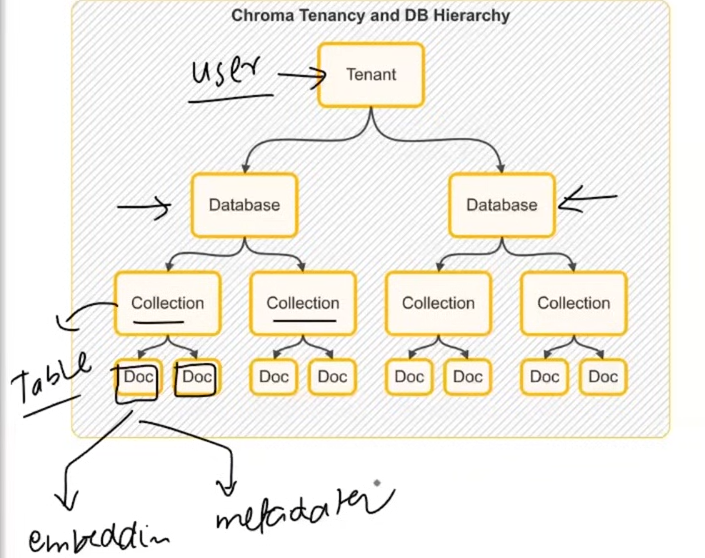

In [ ]:
# 1. Chroma Vector Store

from langchain_community.vectorstores import Chroma
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.documents import Document

# 1. Define your documents
docs = [
    Document(page_content="Machine learning helps computers learn patterns from data.", metadata={'Topic':'Machine Learning'}),
    Document(page_content="Vector databases store embeddings for fast semantic search.", metadata={'Topic':'Vector Databases'}),
    Document(page_content="LangChain connects LLMs with tools, memory, and documents.", metadata={'Topic':'Langchain'})
]
# 2. Initialize the all-MiniLM-L6-v2 embeddings model
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
# 3. Create the vector store from your documents, you can also use add_documents() function on the docs list
vector_store = Chroma.from_documents(
    documents=docs,
    embedding=embeddings,
    collection_name="my_local_store",
    persist_directory='chroma_db'  # can create a local directory to store in sql format
)
# Example: Perform a similarity search
# we can pass the query, the top k most similar vectors we wish to find
query = "What is LangChain?"
results = vector_store.similarity_search(query, k=1)
print(f"Top Result: {results[0].page_content}")
# we can also get the scores of similarity by using similarity_search_with_score() function

# meta-data filtering
results=vector_store.similarity_search(query='',filter={'Topic':'Langchain'})
print(results)

# we can update and delete vector by using their document_id as the index
# similarly we can use FAISS, Piencone etc.